In [1]:
import pandas as pd

# Load the CSV file to examine its contents
file_path = '../commerce/E-commerce.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
df.head()


,Customer ID,Age,Gender,Location,Annual Income,Purchase History,Browsing History,Product Reviews,Time on Site
0,1001,25,Female,City D,45000,"[{""Date"": ""2022-03-05"", ""Category"": ""Clothing""...","[{""Timestamp"": ""2022-03-10T14:30:00Z""}, {""Time...","Great pair of jeans, very comfortable. Rating:...",32.50
1,1001,28,Female,City D,52000,"[{""Product Category"": ""Clothing"", ""Purchase Da...","[{""Product Category"": ""Home & Garden"", ""Timest...",Great customer service!,123.45
2,1001,28,Female,City D,65000,"[{""Product Category"": ""Electronics"", ""Purchase...","[{""Product Category"": ""Clothing"", ""Timestamp"":...",Great electronics. The sound quality is excell...,125.60
3,1001,45,Female,City D,70000,"{'Purchase Date': '2022-08-15', 'Product Categ...",{'Timestamp': '2022-09-03 14:30:00'},"{""Product 1"": {""Rating"": 4, ""Review"": ""Great e...",327.60
4,1002,34,Male,City E,45000,"{'Purchase Date': '2022-07-25', 'Product Categ...",{'Timestamp': '2022-08-10 17:15:00'},"{""Product 1"": {""Rating"": 3, ""Review"": ""Good pr...",214.90


# Tratamento dos dados

In [2]:
import pandas as pd
import ast

# Função para analisar strings em objetos Python (se possível)
def parse_history(history):
    try:
        return ast.literal_eval(history)
    except (ValueError, SyntaxError):
        return None

# Carregar o arquivo CSV
file_path = '../commerce/E-commerce.csv'
df = pd.read_csv(file_path)

# Analisar as colunas 'Purchase History' e 'Browsing History' para convertê-las em listas/dicionários Python
df['Purchase History'] = df['Purchase History'].apply(parse_history)
df['Browsing History'] = df['Browsing History'].apply(parse_history)

# Extrair informações relevantes para análise
# Para 'Purchase History': Extrair Data, Categoria e Preço (se disponível)
purchase_expanded = []
for index, row in df.iterrows():
    customer_id = row['Customer ID']
    purchase_history = row['Purchase History']
    time_on_site = row['Time on Site']
    annual_income = row['Annual Income']
    age = row['Age']
    if isinstance(purchase_history, list):
        for purchase in purchase_history:
            date = purchase.get('Date') or purchase.get('Purchase Date')
            category = purchase.get('Category') or purchase.get('Product Category')
            price = purchase.get('Price', None)
            purchase_expanded.append((customer_id, date, category, price, time_on_site, annual_income, age))

# Criar um novo DataFrame para 'Purchase History'
purchase_df = pd.DataFrame(purchase_expanded, columns=['Customer ID', 'Date', 'Category', 'Price', 'Time on Site', 'Annual Income', 'Age'])

# Converter 'Date' para datetime para análise baseada no tempo
purchase_df['Date'] = pd.to_datetime(purchase_df['Date'], errors='coerce')

# Atualizar os nomes das colunas para o português
purchase_df.rename(columns={
    'Customer ID': 'ID do Cliente',
    'Date': 'Data',
    'Category': 'Categoria',
    'Price': 'Preço',
    'Time on Site': 'Tempo no Site',
    'Annual Income': 'Renda Anual',
    'Age': 'Idade'
}, inplace=True)

# Exibir o DataFrame atualizado
purchase_df

,ID do Cliente,Data,Categoria,Preço,Tempo no Site,Renda Anual,Idade
0,1001,2022-03-05,Clothing,34.99,32.50,45000,25
1,1001,2022-02-12,Electronics,129.99,32.50,45000,25
2,1001,2022-01-20,Home & Garden,29.99,32.50,45000,25
3,1001,2022-05-15,Clothing,34.56,123.45,52000,28
4,1001,2022-06-02,Electronics,150.99,123.45,52000,28
5,1001,2022-08-15,Electronics,345.50,125.60,65000,28
6,1001,2022-07-02,Home & Garden,279.99,125.60,65000,28
7,1001,2022-09-15,Clothing,34.50,120.50,45000,24
8,1001,2022-08-15,Clothing,45.23,72.30,65000,32
9,1001,2022-07-20,Electronics,250.34,72.30,65000,32


In [6]:
import pandas as pd
import ast

# Função para analisar strings em objetos Python (se possível)
def parse_history(history):
    try:
        return ast.literal_eval(history)
    except (ValueError, SyntaxError):
        return None

# Carregar o arquivo CSV
file_path = '../commerce/E-commerce.csv'
df = pd.read_csv(file_path)

# Analisar as colunas 'Purchase History' e 'Browsing History' para convertê-las em listas/dicionários Python
df['Purchase History'] = df['Purchase History'].apply(parse_history)
df['Browsing History'] = df['Browsing History'].apply(parse_history)

# Extrair informações relevantes para análise
purchase_expanded = []
for index, row in df.iterrows():
    customer_id = row['Customer ID']
    purchase_history = row['Purchase History']
    time_on_site = row['Time on Site']
    annual_income = row['Annual Income']
    age = row['Age']
    
    if isinstance(purchase_history, list):
        for purchase in purchase_history:
            date = purchase.get('Date') or purchase.get('Purchase Date')
            category = purchase.get('Category') or purchase.get('Product Category')
            price = purchase.get('Price', None)
            purchase_expanded.append((customer_id, date, category, price, time_on_site, annual_income, age))

# Criar um novo DataFrame para 'Purchase History'
purchase_df = pd.DataFrame(purchase_expanded, columns=[
    'ID do Cliente', 'Data', 'Categoria', 'Preço', 'Tempo no Site', 'Renda Anual', 'Idade'
])

# Converter 'Data' para datetime
purchase_df['Data'] = pd.to_datetime(purchase_df['Data'], errors='coerce')

# Adicionar a coluna 'Sucesso' baseada em 'Renda Anual'
purchase_df['Sucesso'] = purchase_df['Renda Anual'] > 48000

# Exibir o DataFrame atualizado
purchase_df


,ID do Cliente,Data,Categoria,Preço,Tempo no Site,Renda Anual,Idade,Sucesso
0,1001,2022-03-05,Clothing,34.99,32.50,45000,25,False
1,1001,2022-02-12,Electronics,129.99,32.50,45000,25,False
2,1001,2022-01-20,Home & Garden,29.99,32.50,45000,25,False
3,1001,2022-05-15,Clothing,34.56,123.45,52000,28,True
4,1001,2022-06-02,Electronics,150.99,123.45,52000,28,True
5,1001,2022-08-15,Electronics,345.50,125.60,65000,28,True
6,1001,2022-07-02,Home & Garden,279.99,125.60,65000,28,True
7,1001,2022-09-15,Clothing,34.50,120.50,45000,24,False
8,1001,2022-08-15,Clothing,45.23,72.30,65000,32,True
9,1001,2022-07-20,Electronics,250.34,72.30,65000,32,True


In [7]:
n_sucesso = 25
total = 34

p = n_sucesso / total
p

0.7352941176470589

In [13]:
import plotly.express as px
import pandas as pd
from scipy.stats import binom

def gerar_distribuicao_bernoulli(proporcao_sucesso, k):
  """
  Gera a distribuição de Bernoulli para o número de jogos com mais de 2.5 gols em k jogos.

  Args:
    proporcao_sucesso: A proporção de jogos com mais de 2.5 gols (obtida do proportions_df).
    k: O número de jogos.

  Returns:
    Um DataFrame com a tabela de distribuição e um gráfico da distribuição.
  """

  # Calcula a probabilidade de cada número de jogos com mais de 2.5 gols
  probabilidades = [binom.pmf(i, k, proporcao_sucesso) for i in range(k + 1)]

  # Cria um DataFrame com a tabela de distribuição
  tabela_distribuicao = pd.DataFrame({
      'Numero de Jogos com Mais de 2.5 Gols': list(range(k + 1)),
      'Probabilidade': probabilidades
  })

  # Cria um gráfico da distribuição
  fig = px.bar(tabela_distribuicao,
               x='Numero de Jogos com Mais de 2.5 Gols',
               y='Probabilidade',
               title=f'Distribuição de Bernoulli para {k} Jogos com Probabilidade de Sucesso {proporcao_sucesso:.2f}')
  fig.show()

  return tabela_distribuicao




In [16]:
gerar_distribuicao_bernoulli(p, 50)

,Numero de Jogos com Mais de 2.5 Gols,Probabilidade
0,0,1.374610e-29
1,1,1.909181e-27
2,2,1.299304e-25
3,3,5.774684e-24
4,4,1.884793e-22
5,5,4.816692e-21
6,6,1.003478e-19
7,7,1.752104e-18
8,8,2.615988e-17
9,9,3.391096e-16


# Plotando um gráfico do preço ao longo do tempo

*  Análise de tendências de preços ao longo do tempo.
*  O objetivo é visualizar como os preços médios dos produtos variam mês a mês.
*  Permite identificar tendências como aumento, queda ou estabilização dos preços.

## Perguntas com dados 

Podemos verificar se há uma tendência de crescimento ou queda nos preços e em quais períodos isso ocorre. ?

Em quais meses ou épocas do ano os preços tendem a ser mais altos ou mais baixos ?





   ID do Cliente       Data      Categoria   Preço  Tempo no Site  \
0           1001 2022-03-05       Clothing   34.99          32.50   
1           1001 2022-02-12    Electronics  129.99          32.50   
2           1001 2022-01-20  Home & Garden   29.99          32.50   
3           1001 2022-05-15       Clothing   34.56         123.45   
4           1001 2022-06-02    Electronics  150.99         123.45   

   Renda Anual  Idade  
0        45000     25  
1        45000     25  
2        45000     25  
3        52000     28  
4        52000     28  


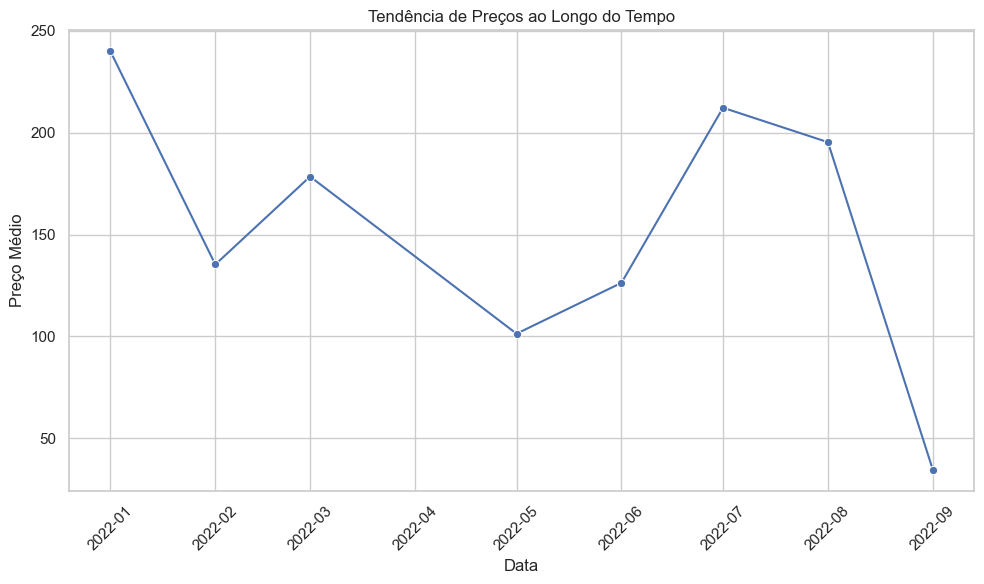

Mês com mais vendas: 6 (Total de vendas: 9)
Mês com menos vendas: 9 (Total de vendas: 1)


C:\Users\Gustavo\AppData\Local\Temp\ipykernel_13332\2007593059.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='viridis')


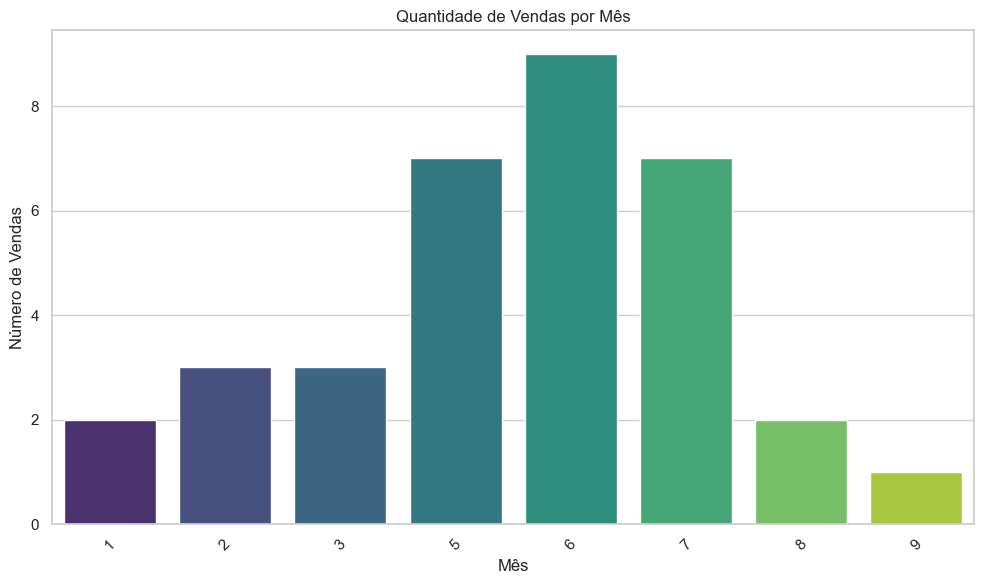

Estatísticas descritivas dos preços por categoria:
               count        mean         std     min       25%     50%  \
Categoria                                                                
Clothing        12.0   61.404167   39.672359   25.60   34.8825   45.61   
Electronics     13.0  217.482308   89.993144  120.00  149.9900  199.99   
Home & Garden    9.0  179.438889  163.791852   29.99   35.0000  129.99   

                    75%    max  
Categoria                       
Clothing        76.2475  150.2  
Electronics    250.3400  420.0  
Home & Garden  279.9900  450.0  


C:\Users\Gustavo\AppData\Local\Temp\ipykernel_13332\2007593059.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=purchase_df, x='Categoria', y='Preço', palette='viridis')


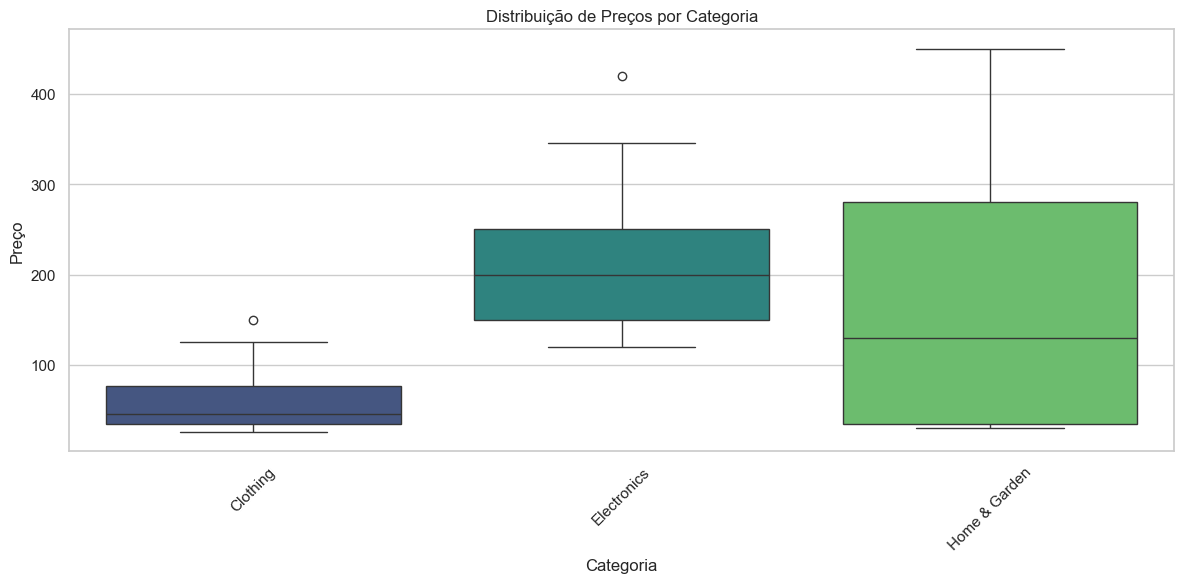

A categoria que vendeu mais foi: 'Electronics' com um total de 13 vendas.
Vendas por categoria, do menor para o maior:
Categoria
Home & Garden     9
Clothing         12
Electronics      13
Name: count, dtype: int64


In [4]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Função para analisar strings em objetos Python (se possível)
def parse_history(history):
    try:
        return ast.literal_eval(history)
    except (ValueError, SyntaxError):
        return None

# Carregar o arquivo CSV
file_path = '../commerce/E-commerce.csv'
df = pd.read_csv(file_path)

# Analisar as colunas 'Purchase History' e 'Browsing History' para convertê-las em listas/dicionários Python
df['Purchase History'] = df['Purchase History'].apply(parse_history)
df['Browsing History'] = df['Browsing History'].apply(parse_history)

# Extrair informações relevantes para análise
# Para 'Purchase History': Extrair Data, Categoria e Preço (se disponível)
purchase_expanded = []
for index, row in df.iterrows():
    customer_id = row['Customer ID']
    purchase_history = row['Purchase History']
    time_on_site = row['Time on Site']
    annual_income = row['Annual Income']
    age = row['Age']
    if isinstance(purchase_history, list):
        for purchase in purchase_history:
            date = purchase.get('Date') or purchase.get('Purchase Date')
            category = purchase.get('Category') or purchase.get('Product Category')
            price = purchase.get('Price', None)
            purchase_expanded.append((customer_id, date, category, price, time_on_site, annual_income, age))

# Criar um novo DataFrame para 'Purchase History'
purchase_df = pd.DataFrame(purchase_expanded, columns=['Customer ID', 'Date', 'Category', 'Price', 'Time on Site', 'Annual Income', 'Age'])

# Converter 'Date' para datetime para análise baseada no tempo
purchase_df['Date'] = pd.to_datetime(purchase_df['Date'], errors='coerce')

# Atualizar os nomes das colunas para o português
purchase_df.rename(columns={
    'Customer ID': 'ID do Cliente',
    'Date': 'Data',
    'Category': 'Categoria',
    'Price': 'Preço',
    'Time on Site': 'Tempo no Site',
    'Annual Income': 'Renda Anual',
    'Age': 'Idade'
}, inplace=True)

# Exibir o DataFrame atualizado
print(purchase_df.head())

# Analisando tendências de preços ao longo do tempo
sns.set(style="whitegrid")

# Agrupar por período mensal e calcular a média dos preços
price_trend = purchase_df.groupby(purchase_df['Data'].dt.to_period('M')).agg({'Preço': 'mean'}).reset_index()
price_trend['Data'] = price_trend['Data'].dt.to_timestamp()

# Plotando a tendência de preços ao longo do tempo
plt.figure(figsize=(10, 6))
sns.lineplot(data=price_trend, x='Data', y='Preço', marker='o', color='b')
plt.title('Tendência de Preços ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Criando uma nova coluna que extrai o mês da data de cada compra
purchase_df['Mês'] = purchase_df['Data'].dt.month

# Contando o número de compras por mês
monthly_sales = purchase_df['Mês'].value_counts().sort_index()

# Identificando o mês com mais e menos vendas
month_most_sales = monthly_sales.idxmax()
month_least_sales = monthly_sales.idxmin()

# Exibindo os resultados
print(f"Mês com mais vendas: {month_most_sales} (Total de vendas: {monthly_sales[month_most_sales]})")
print(f"Mês com menos vendas: {month_least_sales} (Total de vendas: {monthly_sales[month_least_sales]})")

# Visualizando a quantidade de vendas por mês
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='viridis')
plt.title('Quantidade de Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Análise descritiva dos preços por categoria
price_stats = purchase_df.groupby('Categoria')['Preço'].describe()

# Exibindo as estatísticas descritivas
print("Estatísticas descritivas dos preços por categoria:")
print(price_stats)

# Visualizando as distribuições de preços por categoria com um boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=purchase_df, x='Categoria', y='Preço', palette='viridis')
plt.title('Distribuição de Preços por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Preço')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Contando o número de vendas por categoria
sales_by_category = purchase_df['Categoria'].value_counts()

# Identificando a categoria que mais vendeu
top_category = sales_by_category.idxmax()
top_sales = sales_by_category.max()

# Exibindo o resultado
print(f"A categoria que vendeu mais foi: '{top_category}' com um total de {top_sales} vendas.")

# Ordenando as categorias do menor para o maior número de vendas
sorted_sales = sales_by_category.sort_values(ascending=True)

# Exibindo o resultado
print("Vendas por categoria, do menor para o maior:")
print(sorted_sales)

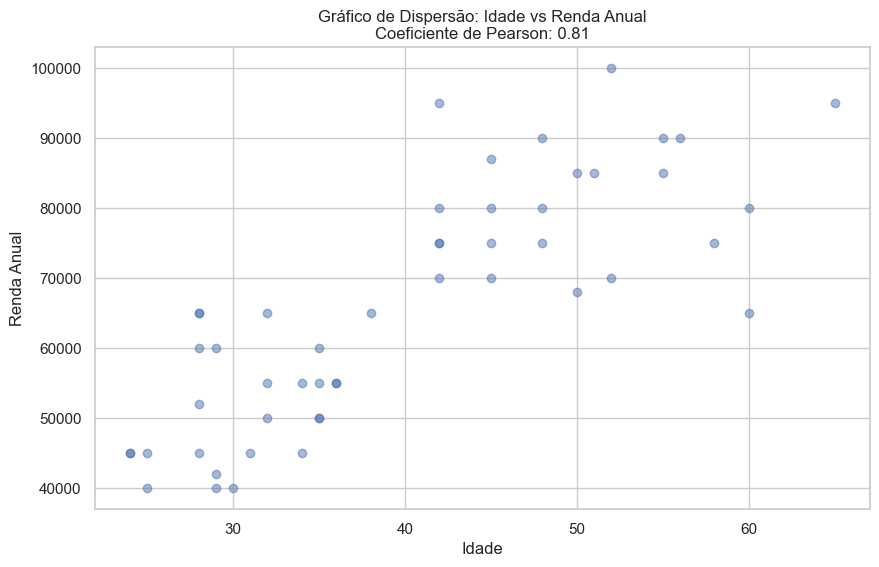

Coeficiente de correlação de Pearson entre Idade e Renda Anual: 0.81


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Carregar o arquivo CSV
file_path = '../commerce/E-commerce.csv'
df = pd.read_csv(file_path)

# Extrair as colunas 'Age' e 'Annual Income'
age = df['Age']
annual_income = df['Annual Income']

# Calcular o coeficiente de correlação de Pearson
correlation, _ = pearsonr(age, annual_income)

# Criar um gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(age, annual_income, alpha=0.5)
plt.title(f'Gráfico de Dispersão: Idade vs Renda Anual\nCoeficiente de Pearson: {correlation:.2f}')
plt.xlabel('Idade')
plt.ylabel('Renda Anual')
plt.grid(True)
plt.show()

# Exibir o valor do coeficiente de correlação de Pearson
print(f'Coeficiente de correlação de Pearson entre Idade e Renda Anual: {correlation:.2f}')

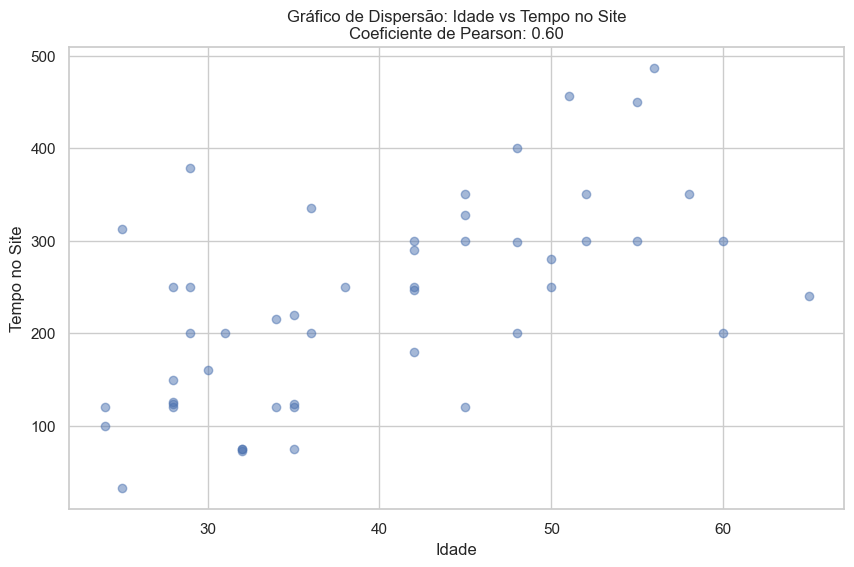

Coeficiente de correlação de Pearson entre Idade e Tempo no Site: 0.60


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Carregar o arquivo CSV
file_path = '../commerce/E-commerce.csv'
df = pd.read_csv(file_path)

# Extrair as colunas 'Age' e 'Time on Site'
age = df['Age']
time_on_site = df['Time on Site']

# Calcular o coeficiente de correlação de Pearson
correlation, _ = pearsonr(age, time_on_site)

# Criar um gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(age, time_on_site, alpha=0.5)
plt.title(f'Gráfico de Dispersão: Idade vs Tempo no Site\nCoeficiente de Pearson: {correlation:.2f}')
plt.xlabel('Idade')
plt.ylabel('Tempo no Site')
plt.grid(True)
plt.show()

# Exibir o valor do coeficiente de correlação de Pearson
print(f'Coeficiente de correlação de Pearson entre Idade e Tempo no Site: {correlation:.2f}')

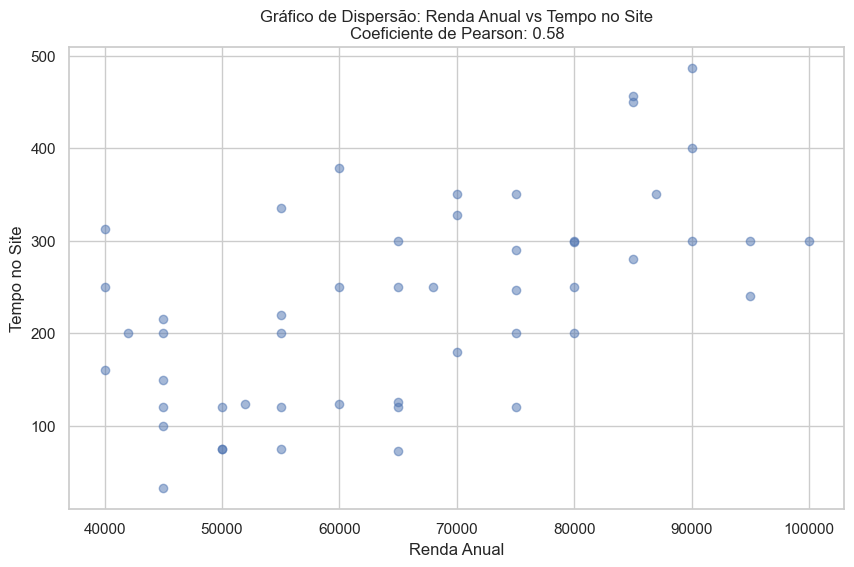

Coeficiente de correlação de Pearson entre Renda Anual e Tempo no Site: 0.58


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Carregar o arquivo CSV
file_path = '../commerce/E-commerce.csv'
df = pd.read_csv(file_path)

# Extrair as colunas 'Annual Income' e 'Time on Site'
annual_income = df['Annual Income']
time_on_site = df['Time on Site']

# Calcular o coeficiente de correlação de Pearson
correlation, _ = pearsonr(annual_income, time_on_site)

# Criar um gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(annual_income, time_on_site, alpha=0.5)
plt.title(f'Gráfico de Dispersão: Renda Anual vs Tempo no Site\nCoeficiente de Pearson: {correlation:.2f}')
plt.xlabel('Renda Anual')
plt.ylabel('Tempo no Site')
plt.grid(True)
plt.show()

# Exibir o valor do coeficiente de correlação de Pearson
print(f'Coeficiente de correlação de Pearson entre Renda Anual e Tempo no Site: {correlation:.2f}')

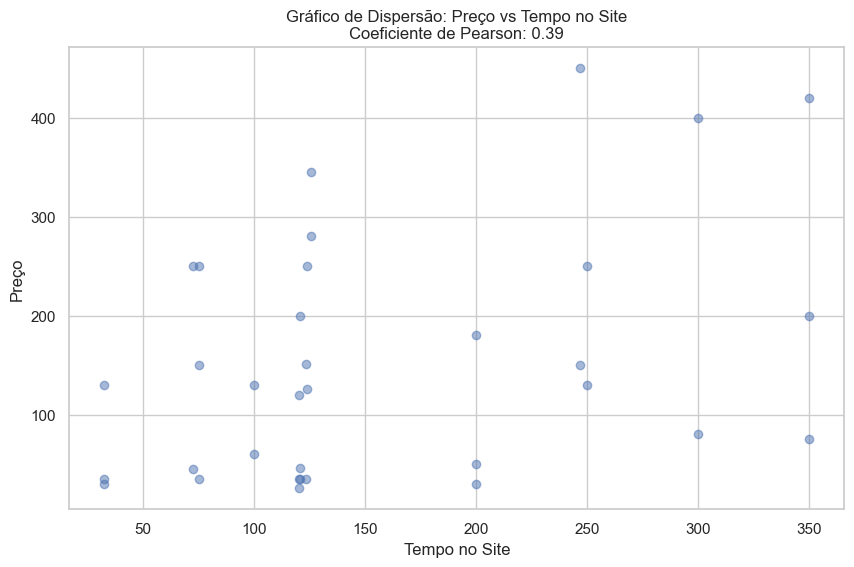

Coeficiente de correlação de Pearson entre Preço e Tempo no Site: 0.39


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Carregar o arquivo CSV
file_path = '../commerce/E-commerce.csv'
df = pd.read_csv(file_path)

# Função para analisar strings em objetos Python (se possível)
def parse_history(history):
    try:
        return ast.literal_eval(history)
    except (ValueError, SyntaxError):
        return None

# Analisar as colunas 'Purchase History' e 'Browsing History' para convertê-las em listas/dicionários Python
df['Purchase History'] = df['Purchase History'].apply(parse_history)
df['Browsing History'] = df['Browsing History'].apply(parse_history)

# Extrair informações relevantes para análise
# Para 'Purchase History': Extrair Data, Categoria e Preço (se disponível)
purchase_expanded = []
for index, row in df.iterrows():
    customer_id = row['Customer ID']
    purchase_history = row['Purchase History']
    time_on_site = row['Time on Site']
    annual_income = row['Annual Income']
    age = row['Age']
    if isinstance(purchase_history, list):
        for purchase in purchase_history:
            date = purchase.get('Date') or purchase.get('Purchase Date')
            category = purchase.get('Category') or purchase.get('Product Category')
            price = purchase.get('Price', None)
            purchase_expanded.append((customer_id, date, category, price, time_on_site, annual_income, age))

# Criar um novo DataFrame para 'Purchase History'
purchase_df = pd.DataFrame(purchase_expanded, columns=['Customer ID', 'Date', 'Category', 'Price', 'Time on Site', 'Annual Income', 'Age'])

# Converter 'Date' para datetime para análise baseada no tempo
purchase_df['Date'] = pd.to_datetime(purchase_df['Date'], errors='coerce')

# Atualizar os nomes das colunas para o português
purchase_df.rename(columns={
    'Customer ID': 'ID do Cliente',
    'Date': 'Data',
    'Category': 'Categoria',
    'Price': 'Preço',
    'Time on Site': 'Tempo no Site',
    'Annual Income': 'Renda Anual',
    'Age': 'Idade'
}, inplace=True)

# Extrair as colunas 'Preço' e 'Tempo no Site'
price = purchase_df['Preço']
time_on_site = purchase_df['Tempo no Site']

# Calcular o coeficiente de correlação de Pearson
correlation, _ = pearsonr(time_on_site, price)

# Criar um gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(time_on_site, price, alpha=0.5)
plt.title(f'Gráfico de Dispersão: Preço vs Tempo no Site\nCoeficiente de Pearson: {correlation:.2f}')
plt.ylabel('Preço')
plt.xlabel('Tempo no Site')
plt.grid(True)
plt.show()

# Exibir o valor do coeficiente de correlação de Pearson
print(f'Coeficiente de correlação de Pearson entre Preço e Tempo no Site: {correlation:.2f}')

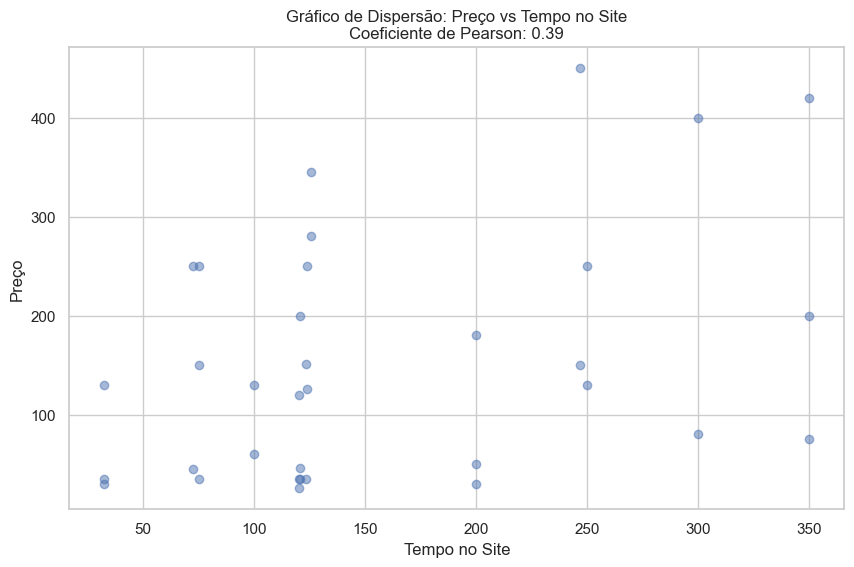

Coeficiente de correlação de Pearson entre Preço e Tempo no Site: 0.39


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import ast

# Função para analisar strings em objetos Python (se possível)
def parse_history(history):
    try:
        return ast.literal_eval(history)
    except (ValueError, SyntaxError):
        return None

# Carregar o arquivo CSV
file_path = '../commerce/E-commerce.csv'
df = pd.read_csv(file_path)

# Analisar as colunas 'Purchase History' e 'Browsing History' para convertê-las em listas/dicionários Python
df['Purchase History'] = df['Purchase History'].apply(parse_history)
df['Browsing History'] = df['Browsing History'].apply(parse_history)

# Extrair informações relevantes para análise
# Para 'Purchase History': Extrair Data, Categoria e Preço (se disponível)
purchase_expanded = []
for index, row in df.iterrows():
    customer_id = row['Customer ID']
    purchase_history = row['Purchase History']
    time_on_site = row['Time on Site']
    if isinstance(purchase_history, list):
        for purchase in purchase_history:
            date = purchase.get('Date') or purchase.get('Purchase Date')
            category = purchase.get('Category') or purchase.get('Product Category')
            price = purchase.get('Price', None)
            purchase_expanded.append((customer_id, date, category, price, time_on_site))

# Criar um novo DataFrame para 'Purchase History'
purchase_df = pd.DataFrame(purchase_expanded, columns=['Customer ID', 'Date', 'Category', 'Price', 'Time on Site'])

# Converter 'Date' para datetime para análise baseada no tempo
purchase_df['Date'] = pd.to_datetime(purchase_df['Date'], errors='coerce')

# Atualizar os nomes das colunas para o português
purchase_df.rename(columns={
    'Customer ID': 'ID do Cliente',
    'Date': 'Data',
    'Category': 'Categoria',
    'Price': 'Preço',
    'Time on Site': 'Tempo no Site'
}, inplace=True)

# Extrair as colunas 'ID do Cliente', 'Preço' e 'Tempo no Site'
customer_id = purchase_df['ID do Cliente']
price = purchase_df['Preço']
time_on_site = purchase_df['Tempo no Site']

# Calcular o coeficiente de correlação de Pearson
correlation, _ = pearsonr(price, time_on_site)

# Criar um gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(time_on_site, price, alpha=0.5)
plt.title(f'Gráfico de Dispersão: Preço vs Tempo no Site\nCoeficiente de Pearson: {correlation:.2f}')
plt.xlabel('Tempo no Site')
plt.ylabel('Preço')
plt.grid(True)
plt.show()

# Exibir o valor do coeficiente de correlação de Pearson
print(f'Coeficiente de correlação de Pearson entre Preço e Tempo no Site: {correlation:.2f}')

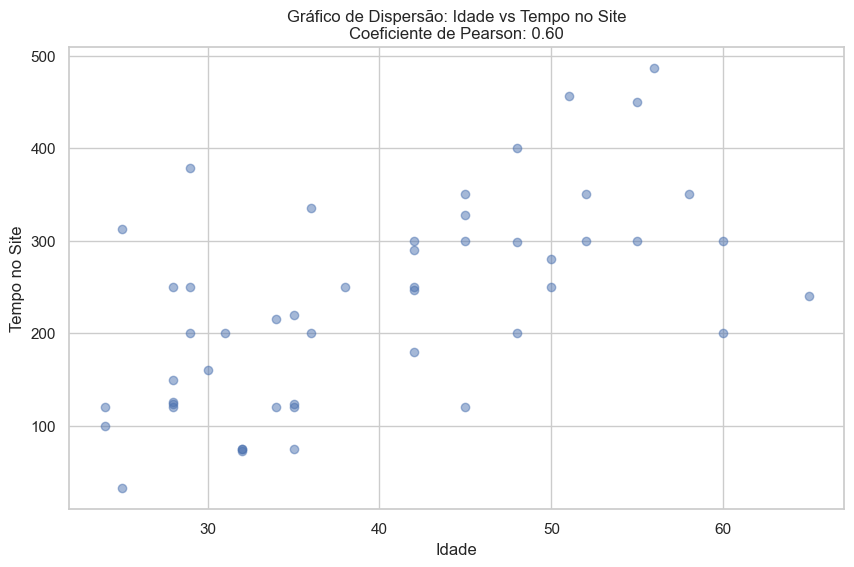

Coeficiente de correlação de Pearson entre Idade e Tempo no Site: 0.60


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Carregar o arquivo CSV
file_path = '../commerce/E-commerce.csv'
df = pd.read_csv(file_path)

# Extrair as colunas 'Age' e 'Time on Site'
age = df['Age']
time_on_site = df['Time on Site']

# Calcular o coeficiente de correlação de Pearson
correlation, _ = pearsonr(age, time_on_site)

# Criar um gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(age, time_on_site, alpha=0.5)
plt.title(f'Gráfico de Dispersão: Idade vs Tempo no Site\nCoeficiente de Pearson: {correlation:.2f}')
plt.xlabel('Idade')
plt.ylabel('Tempo no Site')
plt.grid(True)
plt.show()

# Exibir o valor do coeficiente de correlação de Pearson
print(f'Coeficiente de correlação de Pearson entre Idade e Tempo no Site: {correlation:.2f}')

# Identicando meses com mais ou menos vendas

* Sazonalidade: Podemos identificar se há sazonalidade nas vendas, ou seja, se existem meses do ano com picos (ex.: dezembro, por conta do Natal) ou baixas (ex.: janeiro, pós-festas) que podem ser usados para planejar promoções e campanhas. 

* Planejamento de Estoque: Saber quais meses têm maior demanda permite um melhor planejamento de estoque, evitando falta de produtos em períodos de alta e excessos em períodos de baixa.

* Oportunidades de Marketing: Períodos de baixa nas vendas podem ser alvos de campanhas promocionais específicas para aumentar o tráfego e o volume de vendas nesses meses.

## Perguntas 

Os preços seguem um padrão sazonal?

Em quais meses os preços atingem o seu ponto mais alto ou mais baixo ?




In [11]:
import pandas as pd

# Assumindo que purchase_df já contém os dados das compras e que a coluna 'Date' já está em formato datetime
# Se ainda não estiver, podemos converter a coluna para datetime usando:
# purchase_df['Date'] = pd.to_datetime(purchase_df['Date'], errors='coerce')

# Criando uma nova coluna que extrai o mês da data de cada compra
purchase_df['Month'] = purchase_df['Date'].dt.month

# Contando o número de compras por mês
monthly_sales = purchase_df['Month'].value_counts().sort_index()

# Identificando o mês com mais e menos vendas
month_most_sales = monthly_sales.idxmax()
month_least_sales = monthly_sales.idxmin()

# Exibindo os resultados
print(f"Mês com mais vendas: {month_most_sales} (Total de vendas: {monthly_sales[month_most_sales]})")
print(f"Mês com menos vendas: {month_least_sales} (Total de vendas: {monthly_sales[month_least_sales]})")

# Visualizando a quantidade de vendas por mês
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='viridis')
plt.title('Quantidade de Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


KeyError: 'Date'

# Atualizando nomes das colunas para o português

In [6]:

# Também é necessário atualizar as colunas do DataFrame de compras
purchase_df.rename(columns={
    'Customer ID': 'ID do Cliente',
    'Date': 'Data',
    'Category': 'Categoria',
    'Price': 'Preço',
    'Month': 'Mes'
}, inplace=True)

purchase_df.head()



,ID do Cliente,Data,Categoria,Preço,Mes
0,1001,2022-03-05,Clothing,34.99,3
1,1001,2022-02-12,Electronics,129.99,2
2,1001,2022-01-20,Home & Garden,29.99,1
3,1001,2022-05-15,Clothing,34.56,5
4,1001,2022-06-02,Electronics,150.99,6


# análise descritiva dos preços por categoria e para visualizar a distribuição de preços com um boxplot. 

*  O objetivo principal dessa análise é entender como os preços variam dentro de cada categoria, identificar padrões, possíveis outliers e tirar conclusões sobre a variação de preços.

* count: Número de produtos em cada categoria.
mean: Média dos preços (preço médio).
std: Desvio padrão, que mede a dispersão dos preços.
min e max: Preços mínimo e máximo.
quartis: Valores nos percentis 25%, 50% (mediana) e 75%, que ajudam a entender como os preços estão distribuídos dentro de cada categoria.

* Importância: Essa análise estatística fornece uma visão quantitativa da variação de preços em cada categoria. Com essas informações, podemos identificar categorias com preços mais baixos, mais altos e aquelas com maior variação de preços.

* Se uma categoria tem uma média de preço alta e um desvio padrão elevado, isso sugere que os preços nessa categoria variam bastante (há itens tanto baratos quanto caros).

## Perguntas

Quais categorias têm os preços mais altos e mais baixos em média ?

Em quais categorias os outliers são mais frequentes ?

Qual categoria tem a maior variação de preços ?

Estatísticas descritivas dos preços por categoria:
               count        mean         std     min       25%     50%  \
Categoria                                                                
Clothing        12.0   61.404167   39.672359   25.60   34.8825   45.61   
Electronics     13.0  217.482308   89.993144  120.00  149.9900  199.99   
Home & Garden    9.0  179.438889  163.791852   29.99   35.0000  129.99   

                    75%    max  
Categoria                       
Clothing        76.2475  150.2  
Electronics    250.3400  420.0  
Home & Garden  279.9900  450.0  


c:\AppData\Local\Temp\ipykernel_9124\2316642858.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=purchase_df, x='Categoria', y='Preço', palette='viridis')


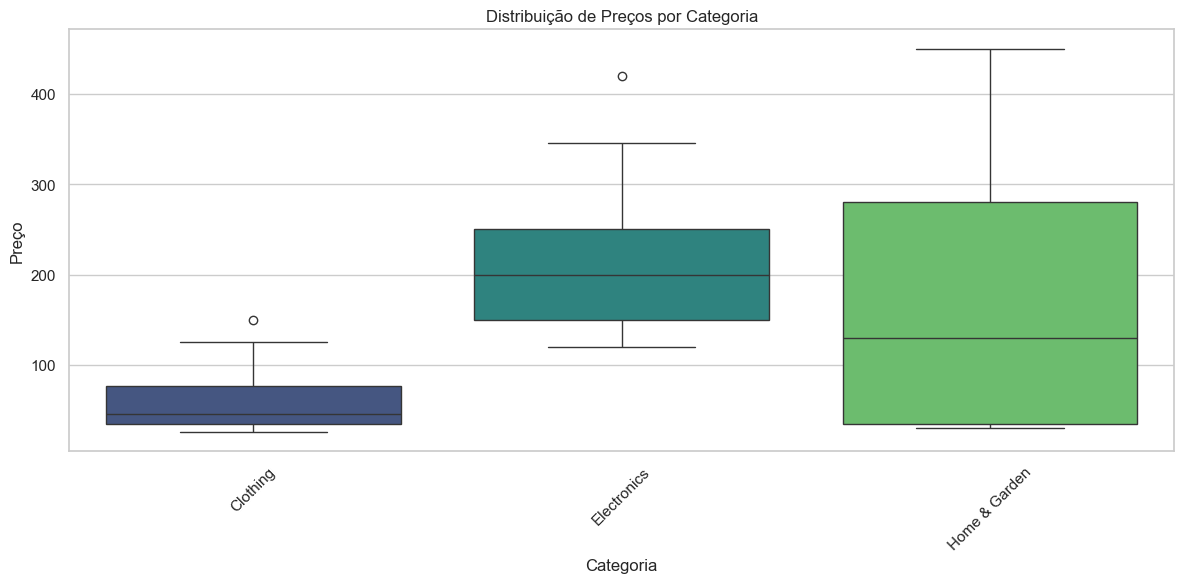

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assumindo que purchase_df já foi atualizado e contém as colunas 'Categoria' e 'Preço'

# Análise descritiva dos preços por categoria
price_stats = purchase_df.groupby('Categoria')['Preço'].describe()

# Exibindo as estatísticas descritivas
print("Estatísticas descritivas dos preços por categoria:")
print(price_stats)

# Visualizando as distribuições de preços por categoria com um boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=purchase_df, x='Categoria', y='Preço', palette='viridis')
plt.title('Distribuição de Preços por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Preço')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Categoria que mais vendeu

In [8]:
import pandas as pd

# Assumindo que purchase_df já contém os dados das compras e que a coluna 'Categoria' está atualizada

# Contando o número de vendas por categoria
sales_by_category = purchase_df['Categoria'].value_counts()

# Identificando a categoria que mais vendeu
top_category = sales_by_category.idxmax()
top_sales = sales_by_category.max()

# Exibindo o resultado
print(f"A categoria que vendeu mais foi: '{top_category}' com um total de {top_sales} vendas.")


A categoria que vendeu mais foi: 'Electronics' com um total de 13 vendas.


In [9]:
import pandas as pd

# Assumindo que purchase_df já contém os dados das compras e que a coluna 'Categoria' está atualizada

# Contando o número de vendas por categoria
sales_by_category = purchase_df['Categoria'].value_counts()

# Ordenando as categorias do menor para o maior número de vendas
sorted_sales = sales_by_category.sort_values(ascending=True)

# Exibindo o resultado
print("Vendas por categoria, do menor para o maior:")
print(sorted_sales)


Vendas por categoria, do menor para o maior:
Categoria
Home & Garden     9
Clothing         12
Electronics      13
Name: count, dtype: int64


# Baseado nas medidas descritivas é possível saber qual categoria poderia ter mais investmento ?